In [1]:
# ======================== Les actions =================================================================
# Drop 2007 et 2008
# Drop Temp9am car c'est la même donnée que TempMin et Temp3pm qui est le même que TempMax
# Drop Uluru et Alice Springs car trop de nan
# Pour les nan restants on a récupéré les villes "radar" du point de vue météo, et on recopie les données manquantes des villes par rapport aux villes radar (à priori il y fait le même temps)
# Transformer la date en jour mois année
# Ajouter la notion de ville radar pour compléter les données manquantes dans un DF
# Faire un DF pour chaque ville / année et y stocker les moyennes des variables afin de remplir les derniers nan par ces valeurs
# Cloud9am et Cloud3pm liés sur les informations manquantes ==> je propose de dropper Cloud9am
# WindGustDir vent dominant on garde cela et on enlève WindDir9am WindDir3pm
# Idem pour WindGustSpeed
# ======================================================================================================
# 49 villes mais certaines ont très peu de données. Adelaide n'a aucune Sunshine


In [2]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [818]:
#===== Importation du fichier d'origine, je l'appelle full_data
full_data = pd.read_csv('weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [558]:
full_data.duplicated().sum()

0

In [824]:
#Je récupère les données radar
villesref=pd.read_csv("VilleRef2.csv",sep=";")

In [825]:
villesref

,Ville,Radar
0,Adelaide,Nuriootpa
1,Albany,Perth
2,Albury,SydneyAirport
3,AliceSprings,Darwin
4,BadgerysCreek,SydneyAirport
5,Ballarat,MelbourneAirport
6,Bendigo,MelbourneAirport
7,Brisbane,isole
8,Cairns,isole
9,Canberra,SydneyAirport


In [827]:
dict_villes={}
for idx_ville,ligne in villesref.iterrows():
    dict_villes[ligne['Ville']] = ligne['Radar']
#dict_villes

In [828]:
# Je transforme la date en jour mois année car 
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day
full_data['week'] = full_data['Date'].dt.isocalendar().week

In [829]:
#Je droppe les villes où il y a trop peu de données
full_data.drop(full_data[full_data['Location'] == 'Katherine'].index, inplace = True, axis=0)
full_data.drop(full_data[full_data['Location'] == 'Launceston'].index, inplace = True, axis=0)

In [830]:
#2007 et 2008 sont quasi vides on supprime
full_data.drop(full_data[full_data['year'] == 2007].index, inplace = True, axis=0)
full_data.drop(full_data[full_data['year'] == 2008].index, inplace = True, axis=0)

In [831]:
full_data.shape

(138542, 27)

In [798]:
full_data = full_data.dropna(subset=['RainToday'],axis=0)
full_data = full_data.dropna(subset=['RainTomorrow'],axis=0)

In [832]:
full_data=full_data.drop('Temp9am',axis=1)
full_data=full_data.drop('Temp3pm',axis=1)
full_data=full_data.drop('WindDir9am',axis=1)
full_data=full_data.drop('WindDir3pm',axis=1)
full_data=full_data.drop('WindSpeed9am',axis=1)
full_data=full_data.drop('WindSpeed3pm',axis=1)
full_data=full_data.drop('Cloud9am',axis=1)
full_data=full_data.drop('Cloud3pm',axis=1)

In [769]:
villes=full_data['Location'].unique()
for ville in villes:
    print (ville," ", full_data[full_data['Location']==ville]['MaxTemp'].mode()[0])

BadgerysCreek   19.0
Cobar   17.0
CoffsHarbour   25.0
Moree   33.7
Newcastle   20.0
NorahHead   19.4
NorfolkIsland   20.3
Penrith   20.0
Richmond   19.8
Sydney   22.9
SydneyAirport   21.7
WaggaWagga   14.6
Williamtown   19.8
Canberra   15.2
Tuggeranong   16.0
MountGinini   13.0
Bendigo   14.1
Sale   14.8
MelbourneAirport   15.0
Melbourne   15.1
Mildura   17.9
Portland   14.8
Watsonia   14.6
Dartmoor   14.4
Brisbane   28.4
Cairns   31.0
GoldCoast   28.4
Townsville   29.1
Adelaide   16.2
MountGambier   14.6
Nuriootpa   14.5
Woomera   18.0
Albany   19.5
Witchcliffe   18.9
PearceRAAF   20.2
PerthAirport   20.2
Perth   19.8
SalmonGums   18.9
Hobart   14.8
Launceston   14.9
Darwin   33.3
Katherine   37.5


In [566]:
ListObj=full_data.select_dtypes(include='object').columns.tolist()
ListObj.remove('Location')
ListObj.remove('RainToday')
ListObj.remove('RainTomorrow')

In [839]:
df1 = tbl_moy[tbl_moy.isnull().any(axis=1)]
full_data.loc[df1.index,['Location','Sunshine','Evaporation','year','month','day']]

,Location,Sunshine,Evaporation,year,month,day
39,Albury,NaN,NaN,2009,1,9
40,Albury,NaN,NaN,2009,1,10
41,Albury,NaN,NaN,2009,1,11
42,Albury,NaN,NaN,2009,1,12
43,Albury,NaN,NaN,2009,1,13
...,...,...,...,...,...,...
4549,BadgerysCreek,NaN,NaN,2013,5,18
4550,BadgerysCreek,NaN,NaN,2013,5,19
4552,BadgerysCreek,NaN,NaN,2013,5,21
4553,BadgerysCreek,NaN,NaN,2013,5,22


In [751]:
villes=full_data['Location'].unique()
for ville in villes:
    print (ville," ", full_data[full_data['Location']==ville]['Sunshine'].mode())

BadgerysCreek   Series([], Name: Sunshine, dtype: float64)
Cobar   0    10.3
Name: Sunshine, dtype: float64
CoffsHarbour   0    0.0
Name: Sunshine, dtype: float64
Moree   0    0.0
Name: Sunshine, dtype: float64
Newcastle   Series([], Name: Sunshine, dtype: float64)
NorahHead   Series([], Name: Sunshine, dtype: float64)
NorfolkIsland   0    0.0
Name: Sunshine, dtype: float64
Penrith   Series([], Name: Sunshine, dtype: float64)
Richmond   Series([], Name: Sunshine, dtype: float64)
Sydney   0    0.0
Name: Sunshine, dtype: float64
SydneyAirport   0    0.0
Name: Sunshine, dtype: float64
WaggaWagga   0    0.0
Name: Sunshine, dtype: float64
Williamtown   0    0.0
Name: Sunshine, dtype: float64
Canberra   0    9.0
Name: Sunshine, dtype: float64
Tuggeranong   Series([], Name: Sunshine, dtype: float64)
MountGinini   Series([], Name: Sunshine, dtype: float64)
Bendigo   Series([], Name: Sunshine, dtype: float64)
Sale   0    0.0
Name: Sunshine, dtype: float64
MelbourneAirport   0    0.0
Name: Sunsh

In [1002]:
# ======================================================================= Les fonctions utiles

In [1000]:
#Fonction qui cherche le mode d'une variable car données insuffisantes pour la ville et pas de données non plus dans la ville radar
def FindValByMode(ville,variable,year,month):
    cond=((full_data['Location']==ville) & (full_data['year']==year) & (full_data['month']==month))
    x=full_data[cond][variable].index
    if (x.empty):
        return np.nan
    else:
        y=full_data[cond][variable].mode()
        if (y.empty):
            return np.nan
        else:
            return full_data[cond][variable].mode()[0]

In [ ]:
# Fonction utilisée à la fin pour mettre à jour les derniers nan par le tableau  des moyennes
def MajVariableParTblMoy(tblval,variable):
    for indx,ville in tblval.iterrows():
        cond=((tbl_moy['Location']==ville['Location']) & (tbl_moy['year']==ville['year']) & (tbl_moy['month']==ville['month']))
        val_moyenne=tbl_moy[cond][variable].to_numpy()
        full_data.loc[indx,variable]=val_moyenne[0]

In [1001]:
# Fonction qui met à jour le tableau des moyennes mensuelles, ce tableau sert à la fin à combler les derniers nan des villes
def Maj_TblMoy(tab_moy,variable):
    for index_val, row in tab_moy.iterrows():
        ville_ref = dict_villes[row['Location']]
        if ville_ref =='isole':
            cond=(full_data['Location']==row['Location'])
        else:
            cond=(full_data['Location']==ville_ref)
        y=full_data[cond & (full_data['year']==row['year'])][variable].mode()
        if (y.empty):
            Mode_An=full_data[cond][variable].mode()[0]
        else:
            Mode_An=y[0]
        tbl_moy.loc[index_val,variable]=Mode_An

In [1003]:
# Récupère dans un DF toutes les lignes qui ont des valeurs Nan pour la variable passée en paramètre
def VisionNull(variable):
    df2 = full_data[full_data[variable].isnull()][['Location','year','month','day']]
    #df2=full_data.loc[lambda full_data: full_data[variable].isnull(), ['Location','year','month','day']]
    return df2.sort_values(by=['Location','year','month','day'])

In [1004]:
#Pour les valeurs nulles importantes on traite par paquet, cette fonction appelle la fonction qui met à jour les données par jour/mois/année en fonction de la ville de réference ou par le mode si données incomplètes
def TraitePaquets(tab_var,variable):
    i=0      
    for indx,ville in tab_var.iterrows():
        V1=ville['Location']
        V2=dict_villes[V1]
        #print(V1,"en cours de traitement...\n")
        if V2=='isole':
            retour=FindValByMode(V1,variable,ville['year'],ville['month'])
        else:
            retour=FindValVilleRef(V2,variable,ville['year'],ville['month'],ville['day'])
            if np.isnan(retour):
                retour=FindValByMode(V2,variable,ville['year'],ville['month'])
         
        full_data.loc[indx,variable]=retour
        i+=1
    return "Fin", i, 'lignes traitées'

In [1005]:
# Fonction qui cherche la valeur de la variable passée en paramètre pour l'année/le mois/le jour
def FindValVilleRef(ville,variable,year,month,day):
    cond=((full_data['Location']==ville) & (full_data['year']==year) & (full_data['month']==month) & (full_data['day']==day))
    x=full_data[cond][variable].index
    if 0 <= x < len(full_data):
        return full_data[cond][variable].to_numpy()[0]
    else:
        return np.nan

In [915]:
tbl_val=VisionNull('Sunshine')
TraitePaquets(tbl_val,'Sunshine')

Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 5
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 6
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns 2016 7
Cairns

('Fin', 50327, 'lignes traitées')

In [917]:
tbl_val=VisionNull('Evaporation')
TraitePaquets(tbl_val,'Evaporation')

('Fin', 46435, 'lignes traitées')

In [872]:
tbl_val=VisionNull('Pressure9am')
TraitePaquets(tbl_val,'Pressure9am')

('Fin', 13816, 'lignes traitées')

In [871]:
tbl_val=VisionNull('Pressure3pm')
TraitePaquets(tbl_val,'Pressure3pm')

('Fin', 13776, 'lignes traitées')

In [870]:
tbl_val=VisionNull('MinTemp')
TraitePaquets(tbl_val,'MinTemp')

('Fin', 1419, 'lignes traitées')

In [869]:
tbl_val=VisionNull('MaxTemp')
TraitePaquets(tbl_val,'MaxTemp')

('Fin', 1207, 'lignes traitées')

In [868]:
tbl_val=VisionNull('Rainfall')
TraitePaquets(tbl_val,'Rainfall')

('Fin', 3206, 'lignes traitées')

In [866]:
tbl_val=VisionNull('Humidity9am')
TraitePaquets(tbl_val,'Humidity9am')

('Fin', 2542, 'lignes traitées')

In [864]:
tbl_val=VisionNull('Humidity3pm')
TraitePaquets(tbl_val,'Humidity3pm')

('Fin', 2910, 'lignes traitées')

In [921]:
tbl_val=VisionNull('WindGustSpeed')
TraitePaquets(tbl_val,'WindGustSpeed')

('Fin', 9749, 'lignes traitées')

In [991]:
full_data['WindGustDirStr']=full_data['WindGustDir'].astype(str)

In [981]:
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,WindGustDirStr
31,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,WNW,56.0,46.0,26.0,1004.5,1003.2,No,No,2009,1,1,1,WNW
32,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,W,41.0,44.0,22.0,1014.4,1013.1,No,No,2009,1,2,1,W
33,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,SSE,26.0,43.0,22.0,1018.7,1014.8,No,No,2009,1,3,1,SSE
34,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,WNW,37.0,41.0,12.0,1015.1,1010.3,No,No,2009,1,4,1,WNW
35,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,WNW,41.0,41.0,9.0,1012.6,1009.2,No,No,2009,1,5,2,WNW


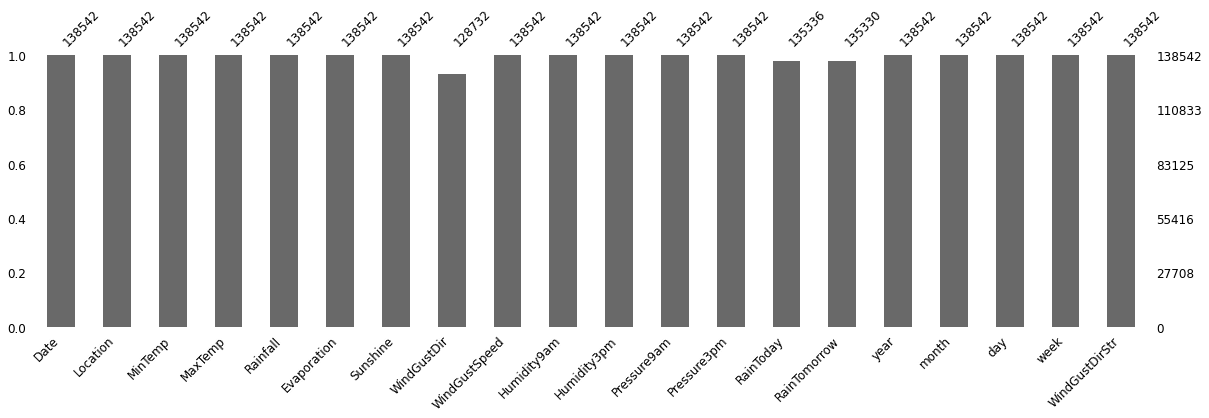

In [983]:
msno.bar(full_data, figsize=(20,5), fontsize=12);

In [937]:
# Je construis le tableau des moyennes mensuelles pour chaque ville / année / mois afin de combler les derniers nan de full_data
tbl_moy=full_data.groupby(['Location','year','month'],as_index=False).mean()
tbl_moy2=full_data.groupby(['Location','year','month','week'],as_index=False).mean()
#tbl_moy=tbl_moy.drop('day',axis=1)
tbl_moy.shape

(4559, 15)

In [968]:
tbl_moy.isnull().sum()

Location         0
year             0
month            0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
day              0
week             0
dtype: int64

In [973]:
full_data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation       1024
Sunshine          2061
WindGustDir       9810
WindGustSpeed        0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
RainToday         3206
RainTomorrow      3212
year                 0
month                0
day                  0
week                 0
WindGustDirStr       0
dtype: int64

In [976]:
#Mise à jour des derniers nan par tblmoy
tbl_val=VisionNull('Evaporation')
MajVariableParTblMoy(tbl_val,'Evaporation')

In [977]:
#Mise à jour des derniers nan par tblmoy
tbl_val=VisionNull('Sunshine')
MajVariableParTblMoy(tbl_val,'Sunshine')

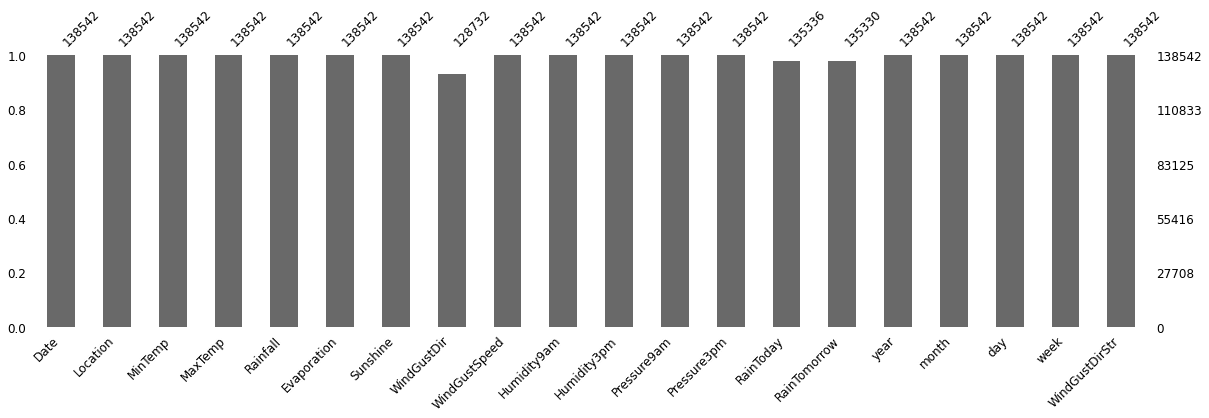

In [998]:
# Graphique Missingno pour évaluer les données manquantes après traitement
msno.bar(full_data, figsize=(20,5), fontsize=12);

In [999]:
#Export du fichier
full_data.to_csv('WeatherAUS_Clean.csv',sep=';',index=False)